In [21]:
# %pip install -r requirements.txt
%pip install pandas

              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450


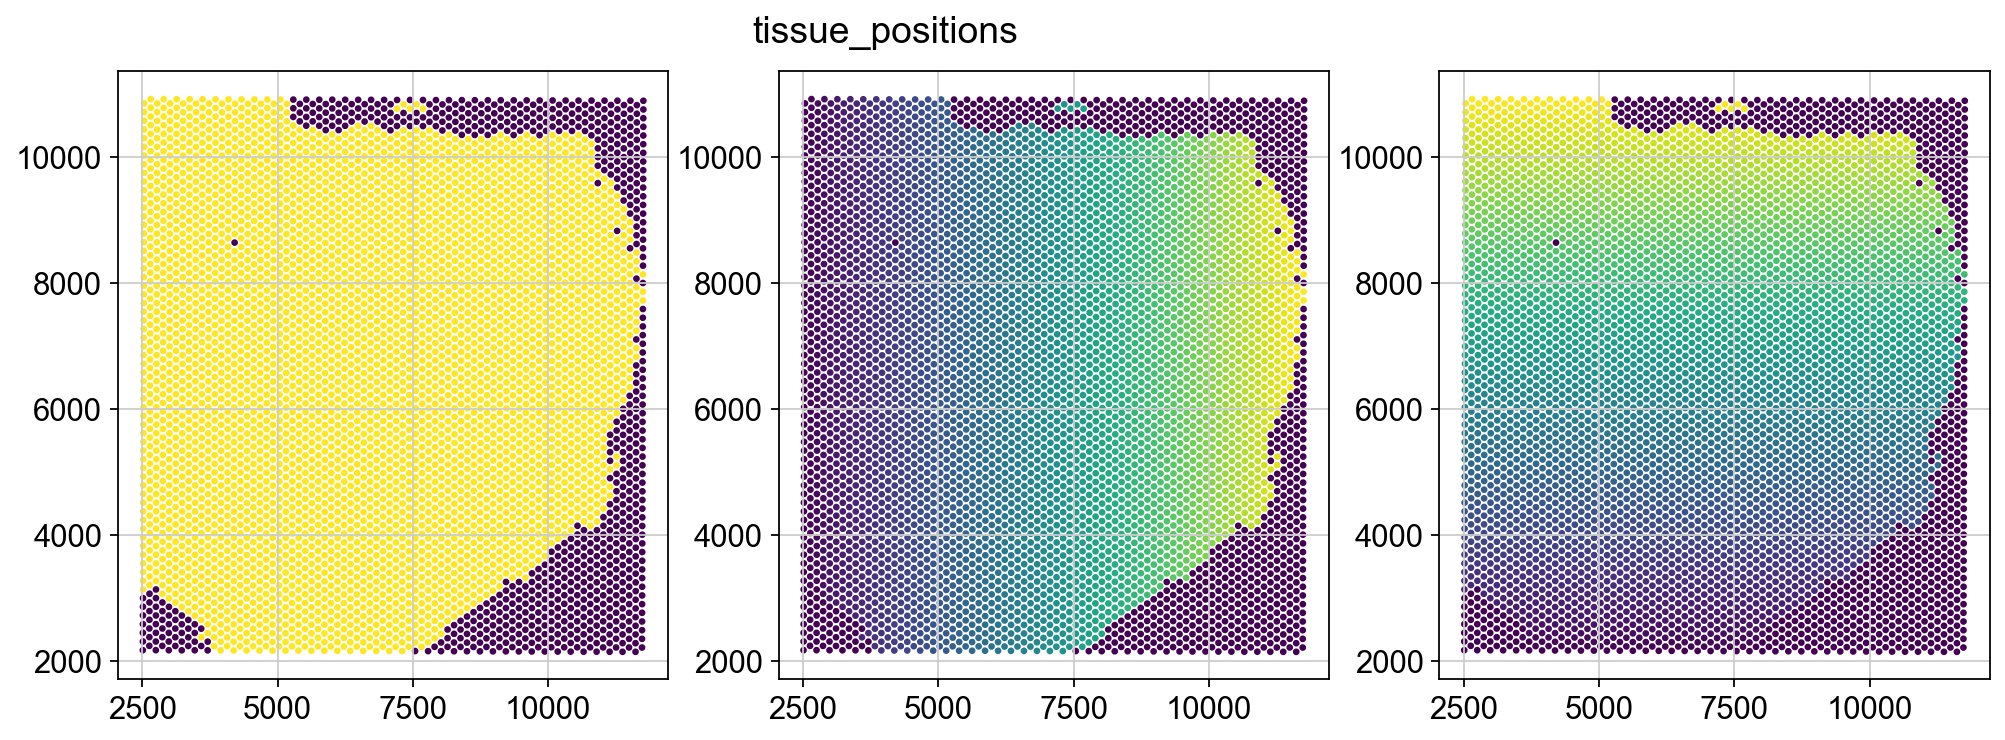

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# Display the dataframe
print(df.head())
#display the 3 graps of the dataframe
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('tissue_positions')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 4)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['xgrad']), cmap = 'viridis', s = 4)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['ygrad']), cmap = 'viridis', s = 4)
plt.show()

In [45]:
path = 'data\data1'
adata = sc.read_visium(path, count_file = "filtered_feature_bc_matrix.h5", source_image_path = path)
print (adata)

reading data\data1\filtered_feature_bc_matrix.h5
 (0:00:00)


C:\Users\91915\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\91915\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [46]:
adata.obs.head()

in_tissue array_row array_col
AAACAACGAATAGTTC-1         1         0        16
AAACAAGTATCTCCCA-1         1        50       102
AAACAATCTACTAGCA-1         1         3        43
AAACACCAATAACTGC-1         1        59        19
AAACAGCTTTCAGAAG-1         1        43         9

metadata 
               barcode layer_guess
0  AAACAACGAATAGTTC-1          -1
1  AAACAAGTATCTCCCA-1          L3
2  AAACAATCTACTAGCA-1          L1
3  AAACACCAATAACTGC-1          WM
4  AAACAGCTTTCAGAAG-1          L6
tis_pos_list 
               barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450
layer list:  {'L2', '-1', 'L5', 'L3', 'L4', 'L1', 'WM', 'L6'}
merged tis_pos_list 
               barcode  present  xgrad  ygrad     x     y layer_guess
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN

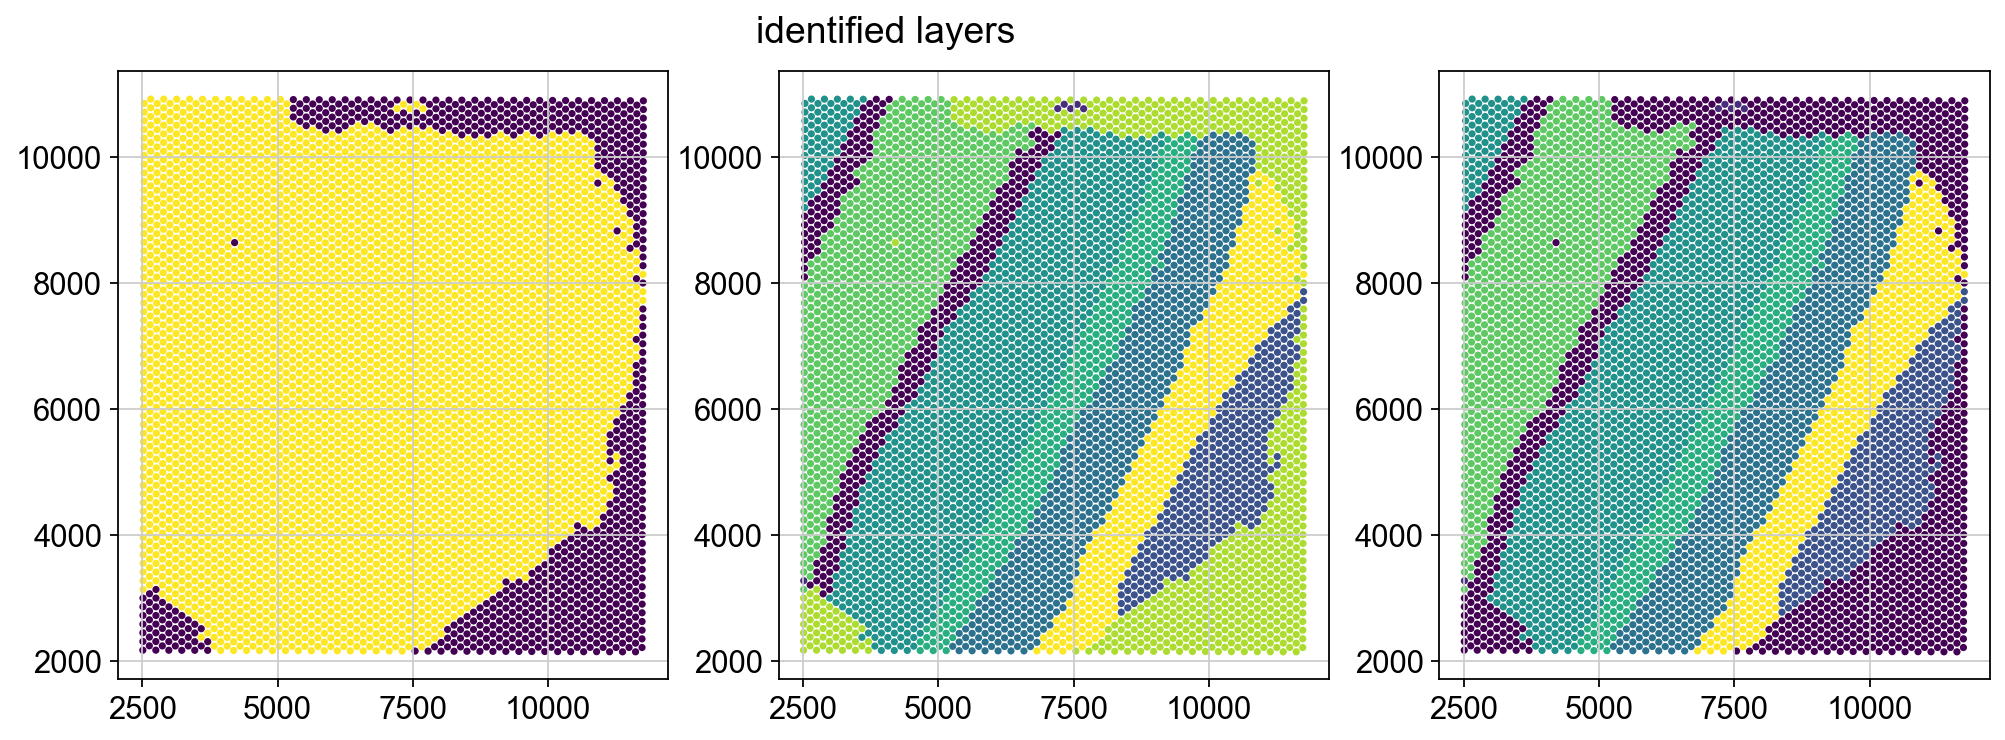

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# metadata = 'data\data1\metadata.tsv'
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# Display the dataframe
print('metadata \n', metadata.head())
print('tis_pos_list \n', df.head())
layers = set(metadata['layer_guess'])
print('layer list: ', layers)

#if barcode in df['barcode'] matches a barcode in metadata['barcode'], then add the meta['layer_guess'] to df['layer_guess'] else put NAN
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
#assign a df['color'] to each in set(df['layer_guess'])
colors = set(df['layer_guess'])
print('merged tis_pos_list \n', df.head())
print('layers now: ', colors)
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('identified layers')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 5)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['color']), cmap = 'viridis', s = 5)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['color']), cmap = 'viridis', s = 5)
plt.show()

In [24]:
pattern = 'ATTAAAGCGGACGAGC-1'
matching_rows = df[df.barcode == pattern]
matching_rows

barcode  present  xgrad  ygrad     x     y layer_guess  color
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      7

In [25]:
print(df.head())
print(df.shape, metadata.shape)

              barcode  present  xgrad  ygrad     x     y layer_guess  color
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN      7
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN      7
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      7
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN      7
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450         NaN      7
(4992, 8) (4226, 2)


In [26]:
%pip install anndata
%pip install scanpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
from anndata import AnnData
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [28]:
def showadata(adata):
    print('\nAdata obs: \n', adata.obs,'\n')
    print('\nGround truth layers: \n',set(adata.obs['ground_truth']))
    print('\nGround truth batch: \n',set(adata.obs['batch']))
    print('\nAdata var: \n',adata.var.keys(),adata.var,'\n')
    print(adata.obsm)
#   print('\nAdata X: \n',adata.X)

In [29]:
def addspatial(adata):
    obs_names = adata.obs.index.tolist()
    barcode_adata , unkownno_adata , adata_lyrguess , adata_grpguess = [],[],[],[]
    for obs in obs_names:
        seg = obs.split('_')
        barcode_adata.append(seg[0])
        unkownno_adata.append(seg[1])
        adata_lyrguess.append(seg[2].split('-')[0])
    adata.obs['barcode'] = barcode_adata
    adata.obs['unkownno'] = unkownno_adata
    adata.obs['adata_lyrguess'] = adata_lyrguess
    # showadata(adata)
    print('\nADATA uniqno:', set(adata.obs['unkownno']))
    print('\nADATA uniqlyr:', set(adata.obs['adata_lyrguess']))
    return adata

In [40]:
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
layers = set(metadata['layer_guess'])
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
colors = set(df['layer_guess'])
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))
i = np.random.randint(0, df.shape[0])
print(df.iloc[i : i + 5])
print(df.shape)

                 barcode  present  xgrad  ygrad     x     y layer_guess  color
3032  CTGGTTTCGAGCAAGA-1        1     46     88  8038  8216          L3      4
3033  TGGGCCCATACTAATT-1        1     47     89  8158  8285          L3      4
3034  ACTTATTTATGTGCCA-1        1     46     90  8039  8354          L3      4
3035  TTAGTTATTCGTGGCA-1        1     47     91  8159  8422          L3      4
3036  AACCGCTAAGGGATGC-1        1     46     92  8039  8491          L3      4
(4992, 8)


In [37]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

adata = sc.read(os.path.join('data\data1',f'DLPFC_single_cell_data_downsampled.h5ad'))
# df_meta = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
layers = set(metadata['layer_guess'])
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
df['color'] = df['layer_guess'].apply(lambda x: list(set(df['layer_guess'])).index(x))
df_meta = df
print(df_meta.head())

# label = pd.Categorical(df_meta['layer_guess']).codes
adata = addspatial(adata) #add spatial info to adata, extract barcode, unkownno, adata_lyrguess
x, y, meta_layer = [], [], []
for index in adata.obs.index.tolist():
    #print('anndata barcode', adata.obs['barcode'][index])
    if adata.obs['barcode'][index] not in df_meta['barcode']:
        x.append(np.nan)
        y.append(np.nan)
        meta_layer.append(np.nan)
    else:
        print('hello')
        x.append(df_meta['x'][adata.obs['barcode'][index] == df_meta['barcode']].values[0])
        y.append(df_meta['y'][adata.obs['barcode'][index] == df_meta['barcode']].values[0])
        meta_layer.append(df_meta['layer_guess'][adata.obs['barcode'][index] == df_meta['barcode']].values[0])
adata.obs['x'] = x
adata.obs['y'] = y
adata.obs['meta_layer'] = meta_layer
# adata = adata[label != -1]
# label = label[label != -1]
# n_clusters = label.max()+1

# pred = pd.read_csv(f'output/{args.name}_pred.csv')['cluster_labels']
# adata.obs['label'] = df_meta['layer_guess']
# adata.obs['pred'] = pred.array.astype(str)

# adata.obsm['ConGI'] = z
# sc.pp.neighbors(adata, use_rep='ConGI')
# sc.tl.umap(adata)


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.3 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 pynndescent==0.5.11


C:\Users\91915\anaconda3\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


              barcode  present  xgrad  ygrad     x     y layer_guess  color
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN      7
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN      7
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      7
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN      7
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450         NaN      7

ADATA uniqno: {'5278', '5864', '5939', '5841', '5893', '5242', '5554', '5531', '4899', '5387', '5144', '5419', '5294', '4849', '5538', '5958', '5408', '5976', '5945', '5163', '5577', '5978', '1823', '6032', '5403', '6033', '5936', '5391', '5879', '4341', '5565'}

ADATA uniqlyr: {'PFC', 'BA24', 'BA46', 'BA9'}


In [41]:
pattern = 'ACTTATTTATGTGCCA-1'
pattern in adata.obs['barcode']

False

In [32]:
print(adata.obs.head())
print(set(adata.obs['y']))
# showadata(adata)

                               ground_truth batch             barcode  \
GAGGTGAAGTGCGTGA-1_4899_BA24-0  Neu-NRGN-II     0  GAGGTGAAGTGCGTGA-1   
AGAGCGAAGCACCGTC-1_5554_BA24-0  Neu-NRGN-II     0  AGAGCGAAGCACCGTC-1   
CACCAGGGTGTATGGG-1_5841_BA9-0   Neu-NRGN-II     0  CACCAGGGTGTATGGG-1   
CAGAGAGTCAGTTTGG-1_5841_BA9-0   Neu-NRGN-II     0  CAGAGAGTCAGTTTGG-1   
AGTGAGGTCATACGGT-1_5387_BA9-0   Neu-NRGN-II     0  AGTGAGGTCATACGGT-1   

                               unkownno adata_lyrguess   x   y  meta_layer  
GAGGTGAAGTGCGTGA-1_4899_BA24-0     4899           BA24 NaN NaN         NaN  
AGAGCGAAGCACCGTC-1_5554_BA24-0     5554           BA24 NaN NaN         NaN  
CACCAGGGTGTATGGG-1_5841_BA9-0      5841            BA9 NaN NaN         NaN  
CAGAGAGTCAGTTTGG-1_5841_BA9-0      5841            BA9 NaN NaN         NaN  
AGTGAGGTCATACGGT-1_5387_BA9-0      5387            BA9 NaN NaN         NaN  
{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

In [33]:
print(adata)
print(set(df['layer_guess']))
print(set(df['color']))
print(set(label))
print(label.size)

AnnData object with n_obs × n_vars = 20904 × 59074
    obs: 'ground_truth', 'batch', 'barcode', 'unkownno', 'adata_lyrguess', 'x', 'y', 'meta_layer'
{'L2', '-1', 'WM', 'L5', 'L3', 'L4', 'L1', nan, 'L6'}
{0, 1, 2, 3, 4, 5, 6, 7, 8}


NameError: name 'label' is not defined

In [122]:
adata = sc.read(os.path.join('data\data1',f'DLPFC_single_cell_data_downsampled.h5ad'))
showadata(adata)
print('\n##########################################\n')
addspatial(adata)

d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(



Adata obs: 
                                 ground_truth batch
GAGGTGAAGTGCGTGA-1_4899_BA24-0   Neu-NRGN-II     0
AGAGCGAAGCACCGTC-1_5554_BA24-0   Neu-NRGN-II     0
CACCAGGGTGTATGGG-1_5841_BA9-0    Neu-NRGN-II     0
CAGAGAGTCAGTTTGG-1_5841_BA9-0    Neu-NRGN-II     0
AGTGAGGTCATACGGT-1_5387_BA9-0    Neu-NRGN-II     0
...                                      ...   ...
GCCAAATCACCAGTTA-1_6032_BA24-16       AST-PP    16
AAAGATGGTACCGTTA-1_5945_PFC-16        AST-PP    16
CCGTACTTCACGATGT-1_5531_BA24-16       AST-PP    16
CACAGGCTCTGGAGCC-1_5565_BA9-16        AST-PP    16
GACGGCTGTTCCTCCA-1_5939_BA9-16        AST-PP    16

[20904 rows x 2 columns] 


Ground truth layers: 
 {'Oligodendrocytes', 'Endothelial', 'IN-PV', 'Neu-mat', 'IN-VIP', 'OPC', 'AST-FB', 'L5/6-CC', 'L2/3', 'L4', 'AST-PP', 'Neu-NRGN-I', 'L5/6', 'Neu-NRGN-II', 'Microglia', 'IN-SV2C', 'IN-SST'}

Ground truth batch: 
 {'6', '11', '8', '1', '16', '10', '4', '12', '13', '3', '7', '14', '2', '9', '0', '15', '5'}

Adata var: 
 Ind

AnnData object with n_obs × n_vars = 20904 × 59074
    obs: 'ground_truth', 'batch', 'barcode', 'unkownno', 'adata_lyrguess'